# **1. Perkenalan Dataset**


1. **Sumber**:

   [Customer Shopping Dataset - Retail Sales Data](https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset) 
   
   > Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations.

2. **Ketentuan**:

   ☑ **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.

   ☑ **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   
   ☑ **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   ☑ Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## Tujuan Clustering
Mengelompokkan pelanggan berdasarkan perilaku belanja mereka untuk mengidentifikasi kelompok-kelompok dengan karakteristik dan pola pembelian yang serupa. Segmentasi ini bertujuan untuk membantu stakeholders dalam menyesuaikan strategi pemasaran, meningkatkan layanan pelanggan, dan mengoptimalkan efisiensi operasional. Potential stekholders untuk analisis ini antara lain: retailer, pengelola mall, tim pemasaran, tim strategi bisnis, analis keuangan, investor, pemerintah, dan akademisi atau researcher.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [4]:
dir_ = "dataset/"
filename = "customer_shopping_data.csv"
filepath = dir_ + filename
df = pd.read_csv(filepath)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 1. Memahami Struktur Data
### Jumlah Baris & Kolom

In [3]:
df.shape

(99457, 10)

Dataset terdiri dari 99,457 baris dan 10 kolom

### Jenis Data Per Kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Kolom dengan tipe data numerik:
- age
- quantity
- price

Kolom dengan tipe data kategorik
- invoice_no
- customer_id
- gender
- category
- payment_method
- invoice_date (perlu kita ubah ke date atau datetime)
- shopping_mall

## 2. Menangani Data Yang Hilang

In [5]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

- Dataset tidak mengandung missing values

## 3. **Analisis Distribusi dan Korelasi**  
### Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  

In [6]:
df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.describe())

                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       56.000000      4.000000   1200.320000
max       69.000000      5.000000   5250.000000


In [7]:
numeric_columns = list(df_numeric.columns)
numeric_columns

['age', 'quantity', 'price']

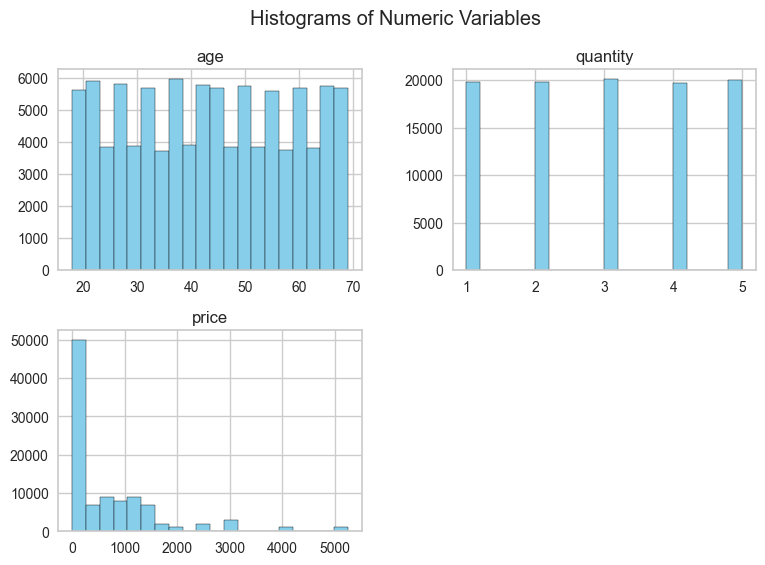

In [8]:
df_numeric.hist(bins=20, figsize=(9, 6), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Variables')
plt.show()

- Distribusi umur customer terlihat merata
- Nilai quantity hanya berkisar di rentang 1-5
- Sebagian besar produk yang dibeli berharga kurang dari 2000 Lira

### Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

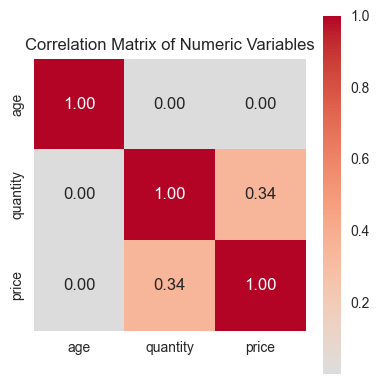

In [10]:
# Select only numerical columns for correlation
correlation_matrix = df[numeric_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, 
           annot=True,  # Show correlation values
           cmap='coolwarm',  # Color scheme: red for positive, blue for negative
           center=0,  # Set 0 as the center value for colors
           fmt='.2f',  # Format numbers to 2 decimal places
           square=True)  # Make cells square-shaped
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

# Display correlation values in table format
# print("\nCorrelation Matrix:")
# print(correlation_matrix.round(2))

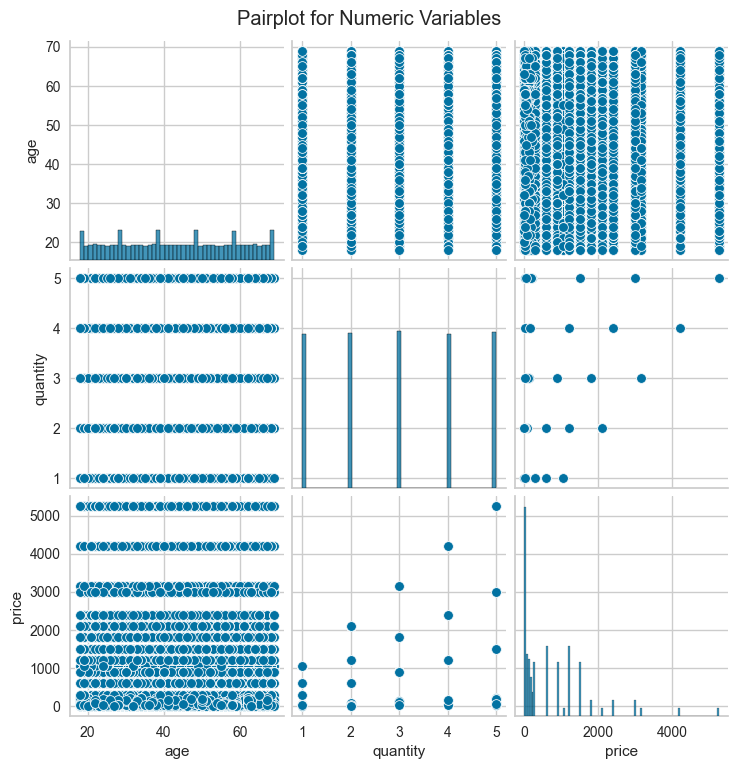

In [11]:
sns.pairplot(df)
plt.suptitle(f"Pairplot for Numeric Variables", y=1.02)  # y=1.02 to adjust title position
plt.show()

- Berdasarkan correlation matrix & pariplot di atas, tidak terdapat hubungan yang kuat antara ketiga variabel numerik.

## 4. **Visualisasi Data**  
### Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  

In [12]:
categoric_columns = df.select_dtypes(include=['object'])

# Descriptive Statistics for Categorical Variables
for col in categoric_columns.columns:
    print(f"Descriptiive Statistics for '{col}':")
    print(df[col].describe())
    print("\n")

Descriptiive Statistics for 'invoice_no':
count       99457
unique      99457
top       I232867
freq            1
Name: invoice_no, dtype: object


Descriptiive Statistics for 'customer_id':
count       99457
unique      99457
top       C273973
freq            1
Name: customer_id, dtype: object


Descriptiive Statistics for 'gender':
count      99457
unique         2
top       Female
freq       59482
Name: gender, dtype: object


Descriptiive Statistics for 'category':
count        99457
unique           8
top       Clothing
freq         34487
Name: category, dtype: object


Descriptiive Statistics for 'payment_method':
count     99457
unique        3
top        Cash
freq      44447
Name: payment_method, dtype: object


Descriptiive Statistics for 'invoice_date':
count          99457
unique           797
top       24/11/2021
freq             159
Name: invoice_date, dtype: object


Descriptiive Statistics for 'shopping_mall':
count                99457
unique                  10
top    

Catatan:
- count: banyaknya nilai/baris/item data
- unique: jumlah nilai unik
- top: nilai yang paling sering muncul atau memiliki frekuensi tertinggi (modus)
- freq: jumlah kemunculan nilai top/mode/modus

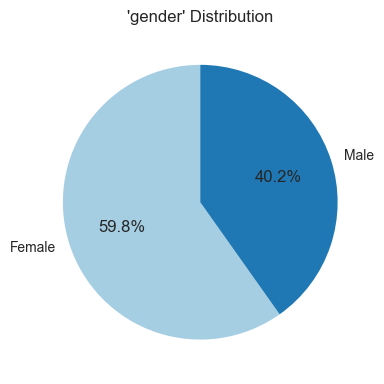

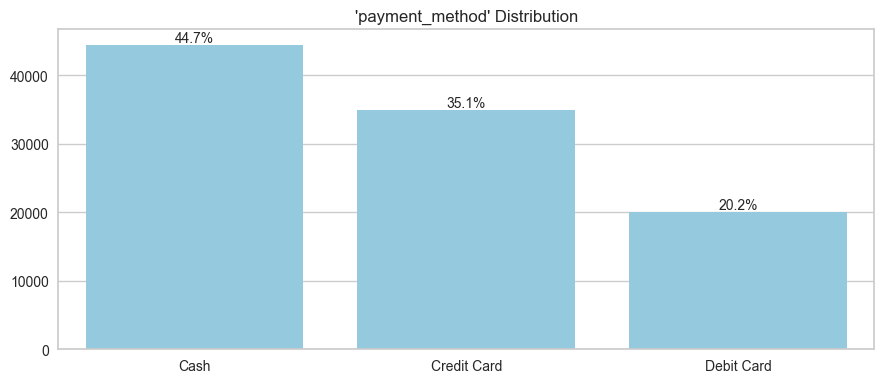

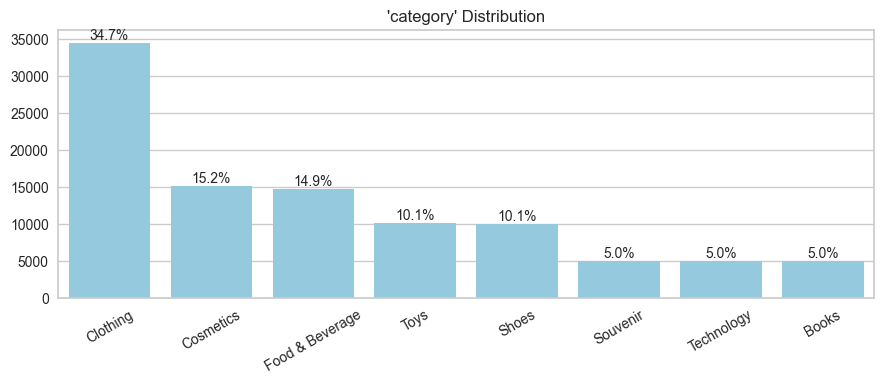

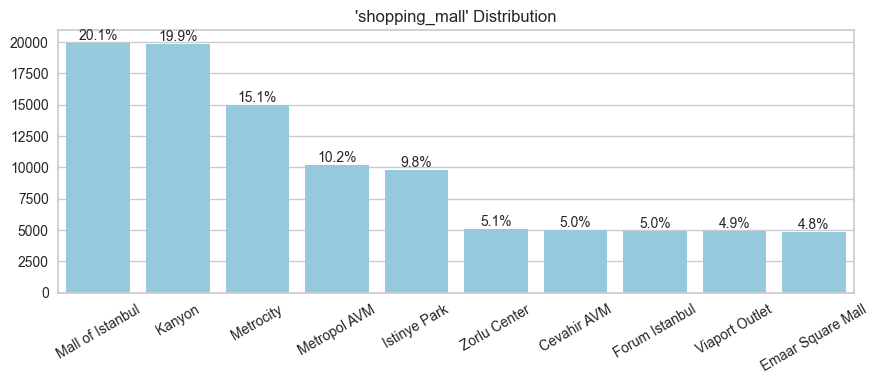

In [13]:
categoric_columns_to_pie = ['gender']
categoric_columns_to_bar = ['payment_method', 'category', 'shopping_mall']
categoric_columns = categoric_columns_to_pie + categoric_columns_to_bar

# Generate Pie Charts using Matplotlib
for col in categoric_columns_to_pie:
    plt.figure(figsize=(4, 4))
    # Get value counts and labels
    values = df[col].value_counts()
    labels = values.index
    
    # Create the pie chart
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f"'{col}' Distribution")
    plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
    plt.tight_layout()  # Prevent label cutoff
    plt.show()

# Generate Bar Charts using Seaborn with Percentage Labels
for col in categoric_columns_to_bar:
    plt.figure(figsize=(9, 4))
    
    # Get value counts and percentages
    value_counts = df[col].value_counts()
    percentages = (value_counts / value_counts.sum()) * 100
    
    # Create the bar chart
    ax = sns.countplot(data=df, 
                       x=col,
                       color='skyblue',  # Set single color to light blue
                       order=value_counts.index)
    
    # Add data labels for percentages
    for p, percentage in zip(ax.patches, percentages):
        height = p.get_height()
        ax.annotate(f'{percentage:.1f}%',  # Format percentage to 1 decimal place
                    (p.get_x() + p.get_width() / 2., height),  # Position in the center of the bar
                    ha='center', va='bottom', fontsize=10)
    
    # Set title and adjust layout
    plt.title(f"'{col}' Distribution")
    plt.ylabel('')
    plt.xlabel('')
    if col in ['category', 'shopping_mall']:
        plt.xticks(rotation=30)
    else:
        plt.xticks(rotation=0)
    plt.tight_layout()  # Prevent label cutoff
    plt.show()

- Lebih banyak customer perempuan daripada laki-laki dengan perbandingan kurang lebih 3:2
- Kategori pakaian (clothing) mendominasi total transaksi sebanyak kurang lebih 35%
- Metode pembayaran terdiri dari cash, credit card, & debit card
- Metode pembayaran yang paling sering digunakan adalah cash (sekitar 45%)
- Retail dengan transaksi tertinggi adalah Mall of Istanbul dan Kanyon, masing-masing sebesar 20% dengan total transaksi masing-masing mendekati 20 ribu

### Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

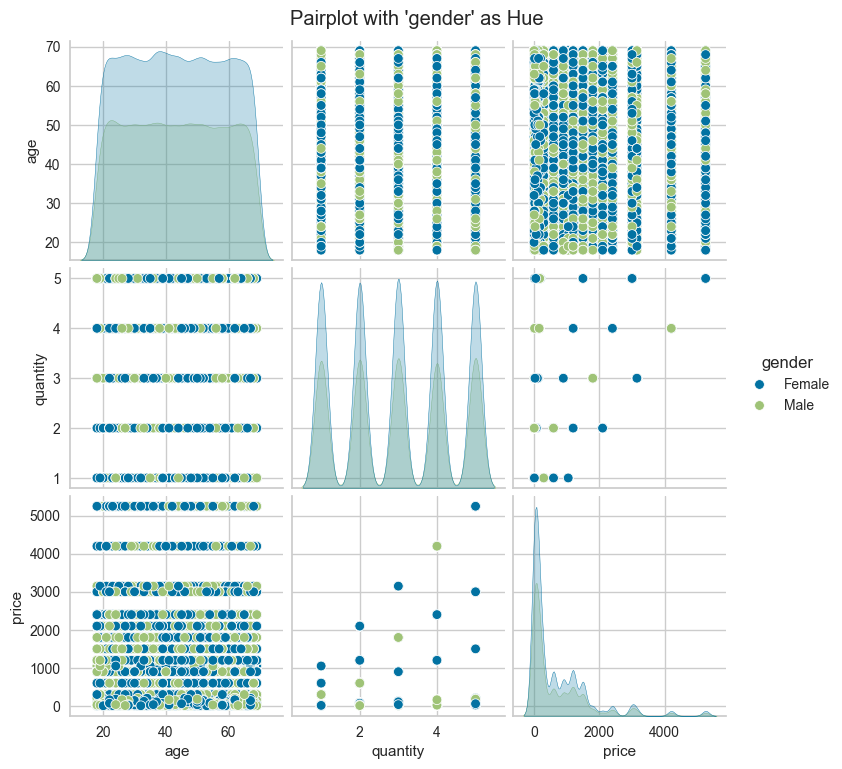

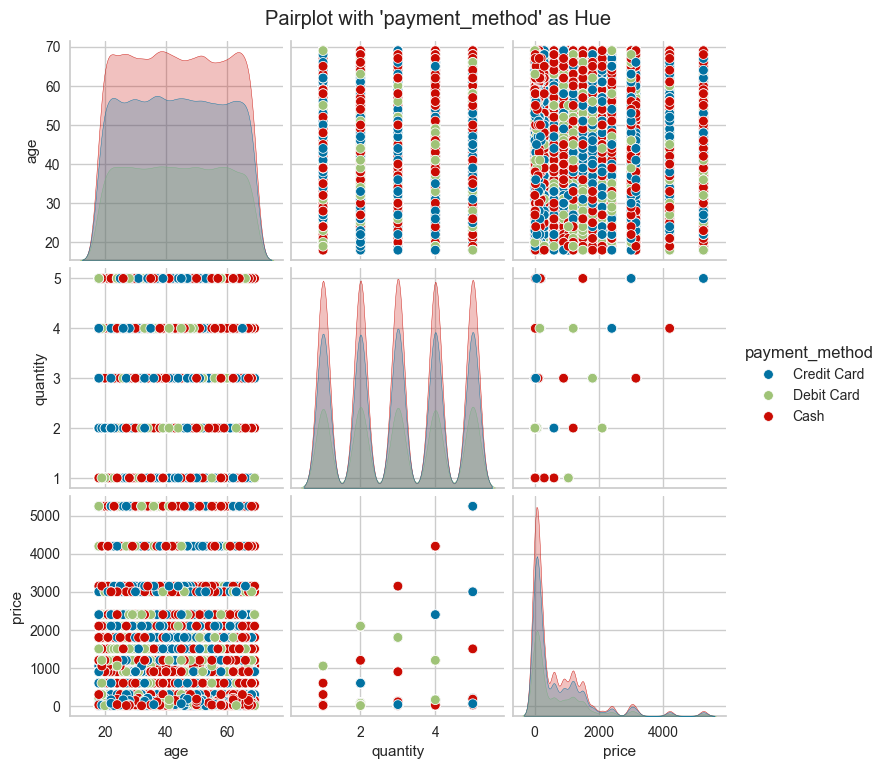

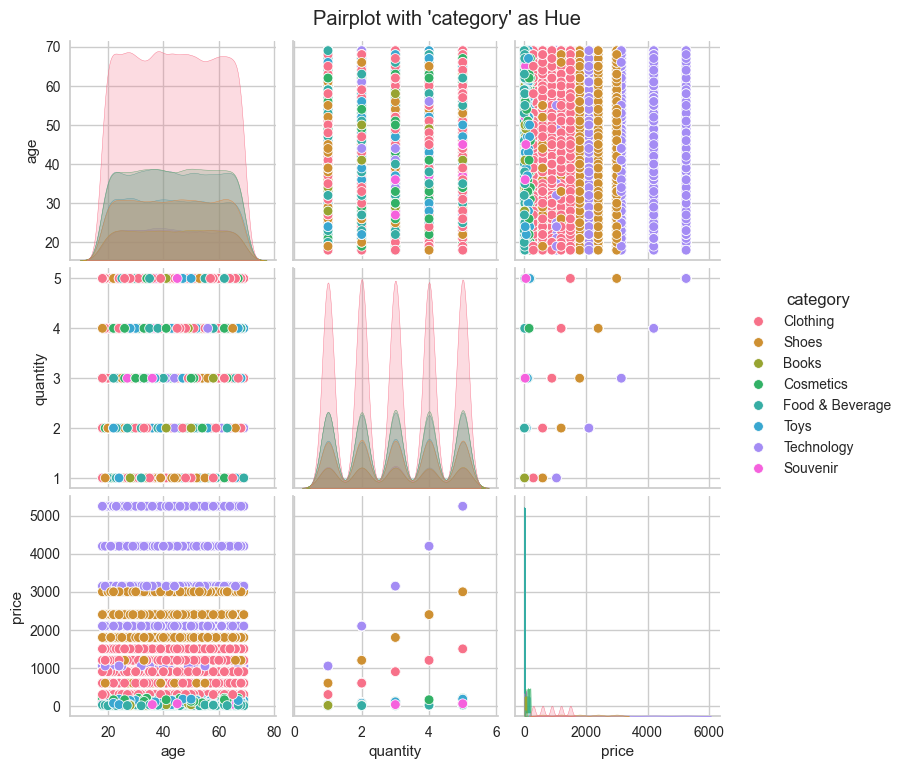

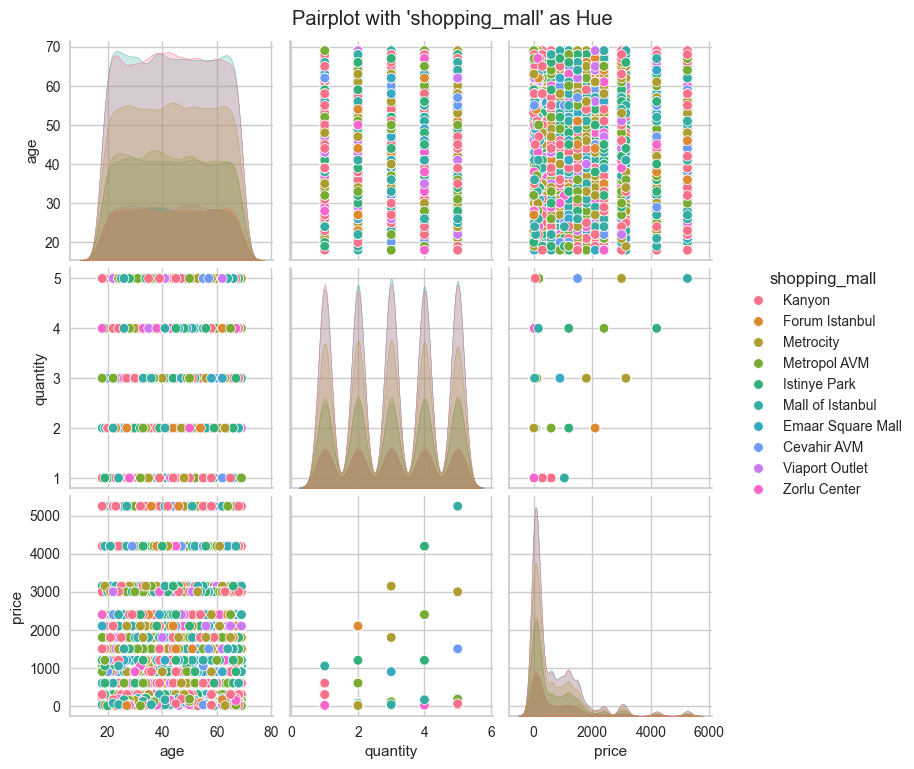

In [13]:
for col in categoric_columns:
    sns.pairplot(df, hue=col, vars=numeric_columns, height=2.5)
    plt.suptitle(f"Pairplot with '{col}' as Hue", y=1.02)  # y=1.02 to adjust title position
    plt.show()

- Secara keseluruhan, belum terlihat pola yang jelas terkait hubungan antar variabel dari pairplot di atas, namun terdapat beberapa hal yang cukup menarik:
- Distribusi harga produk tertinggi (sekitar 50% produk termahal) adalah kategori Shoes dan Technology
- Belum terlihat adanya cluster yang jelas pada semua variabel

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values) -> tidak terdapat missing values
2. Menghapus Data Duplikat -> tidak terdapat data duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## Menghapus Data Duplikat

In [14]:
# Check for duplicates in the entire DataFrame
duplicates = df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


- Tidak terdapat data duplikat

## Menyesuaikan Tipe Data

In [138]:
df['invoice_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 99457 entries, 0 to 99456
Series name: invoice_date
Non-Null Count  Dtype 
--------------  ----- 
99457 non-null  object
dtypes: object(1)
memory usage: 777.1+ KB


In [139]:
# Convert 'invoice_date' to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
df['invoice_date'].describe()

count                         99457
mean     2022-02-04 02:46:59.783424
min             2021-01-01 00:00:00
25%             2021-07-19 00:00:00
50%             2022-02-05 00:00:00
75%             2022-08-22 00:00:00
max             2023-03-08 00:00:00
Name: invoice_date, dtype: object

## Deteksi dan Penanganan Outlier

In [143]:
# Select numerical columns from the DataFrame
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['age', 'quantity', 'price'], dtype='object')

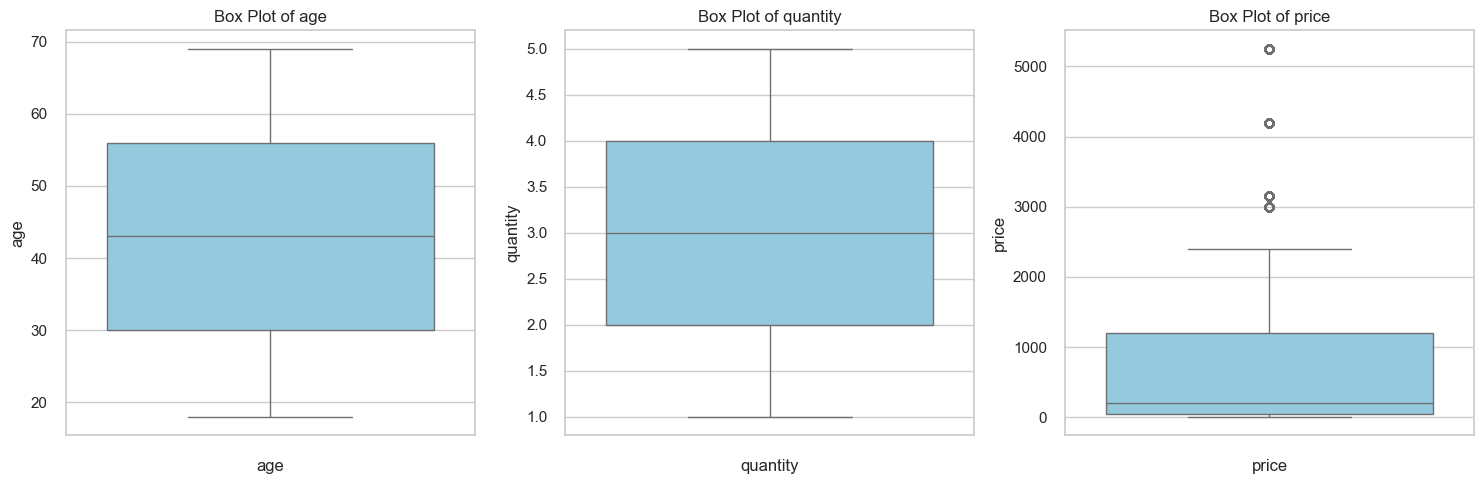

In [144]:
# Set the figure size for Boxplots
plt.figure(figsize=(15, 5))

# Loop through each numerical column
for i, col in enumerate(numeric_columns):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each box plot in 1 row and 3 columns
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

- Berdasarkan boxplot di atas, terlihat ada outliers di variabel `price`.

In [147]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier conditions
outlier_condition = (df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))

# Get the outliers
outliers = df[outlier_condition]

# Display the outliers
print("Outliers in 'price':")
print(outliers[['price', 'category']])  # Adjust the columns as needed to see more information

Outliers in 'price':
         price    category
3      3000.85       Shoes
15     3000.85       Shoes
23     5250.00  Technology
53     4200.00  Technology
69     5250.00  Technology
...        ...         ...
99332  3000.85       Shoes
99374  3150.00  Technology
99387  3150.00  Technology
99424  3150.00  Technology
99455  4200.00  Technology

[5024 rows x 2 columns]


- Setelah diperiksa, outliers ini masih terlihat wajar (harga produk sepatu dan teknologi lebih tinggi dari produk lain) sehingga tidak perlu dihapus (tidak terindikasi human error / system error).

## Binning (Pengolompokan Data)

In [148]:
df['age'].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [149]:
df_bin = df.copy()

bins_age = [17, 20, 30, 40, 50, 60, 70]
labels_age_groups = ['17-20', '21-29', '30-39', '40-49', '50-59', '60+']

# Create a new column 'age_bins' to hold the binned data
df_bin['age_group'] = pd.cut(df_bin['age'], bins=bins_age, labels=labels_age_groups, right=True)

# Display the binned data
df_bin[['age','age_group']].head()

,age,age_group
0,28,21-29
1,21,21-29
2,20,17-20
3,66,60+
4,53,50-59


In [150]:
# Drop the 'age' column from df_bin
df_bin = df_bin.drop(columns=['age'])
df_bin.columns

Index(['invoice_no', 'customer_id', 'gender', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall', 'age_group'],
      dtype='object')

## Encoding Data Kategorikal

In [151]:
df_encoded = df_bin.copy()

# Frequency Encoding for 'payment_method', 'category', and 'shopping_mall'
def frequency_encoding(series):
    freq = series.value_counts()
    return series.map(freq)

df_encoded['gender'] = frequency_encoding(df_encoded['gender'])
df_encoded['category'] = frequency_encoding(df_encoded['category'])
df_encoded['payment_method'] = frequency_encoding(df_encoded['payment_method'])
df_encoded['shopping_mall'] = frequency_encoding(df_encoded['shopping_mall'])

# Apply Ordinal Encoding for 'age_groups'
ordinal_encoder = OrdinalEncoder()
df_encoded['age_group'] = ordinal_encoder.fit_transform(df_encoded[['age_group']])

print("Encoded DataFrame:")
df_encoded.head()


Encoded DataFrame:


,invoice_no,customer_id,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
0,I138884,C241288,59482,34487,5,1500.40,34931,2022-08-05,19823,1.0
1,I317333,C111565,39975,10034,3,1800.51,20079,2021-12-12,4947,1.0
2,I127801,C266599,39975,34487,1,300.08,44447,2021-11-09,15011,0.0
3,I173702,C988172,59482,10034,5,3000.85,34931,2021-05-16,10161,5.0
4,I337046,C189076,59482,4981,4,60.60,44447,2021-10-24,19823,4.0


- Frequency encoding dipilih untuk menghindari dimensional bomb dengan tetap mempertahankan informasi kemunculan data dalam dataset serta mencegah fitur tertentu terlalu mendominasi clustering karena algoritma clustering yang akan dipilih adalah kmeans yang berbasis pada eucledian distance
- Ordinal encoding dipilih untuk age_groups karena secara konteks age_groups memang memiliki urutan

## Normalisasi atau Standarisasi Fitur

In [152]:
# Get the list of numeric columns (both int and float types)
numeric_columns = list(df_encoded.select_dtypes(include=['number']).columns)
numeric_columns

['gender',
 'category',
 'quantity',
 'price',
 'payment_method',
 'shopping_mall',
 'age_group']

In [153]:
minmax_scaler = MinMaxScaler()

df_norm = df_encoded.copy()
df_norm[numeric_columns] = minmax_scaler.fit_transform(df_norm[numeric_columns])

print("Normalized DataFrame:")
df_norm.head()

Normalized DataFrame:


,invoice_no,customer_id,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
0,I138884,C241288,1.0,1.000000,1.00,0.285078,0.609488,2022-08-05,0.992070,0.2
1,I317333,C111565,0.0,0.171253,0.50,0.342299,0.000000,2021-12-12,0.008988,0.2
2,I127801,C266599,0.0,1.000000,0.00,0.056218,1.000000,2021-11-09,0.674068,0.0
3,I173702,C988172,1.0,0.171253,1.00,0.571163,0.609488,2021-05-16,0.353555,1.0
4,I337046,C189076,1.0,0.000000,0.75,0.010557,1.000000,2021-10-24,0.992070,0.8


In [154]:
df_norm.describe()

,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group
count,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000
mean,0.598068,0.482998,0.500857,0.130421,0.660959,2022-02-04 02:46:59.783424,0.570679,0.556427
min,0.000000,0.000000,0.000000,0.000000,0.000000,2021-01-01 00:00:00,0.000000,0.000000
25%,0.000000,0.171253,0.250000,0.007669,0.609488,2021-07-19 00:00:00,0.328443,0.200000
50%,1.000000,0.331966,0.500000,0.037765,0.609488,2022-02-05 00:00:00,0.674068,0.600000
75%,1.000000,1.000000,0.750000,0.227863,1.000000,2022-08-22 00:00:00,0.992070,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2023-03-08 00:00:00,1.000000,1.000000
std,0.490291,0.392017,0.353256,0.179452,0.374833,NaN,0.403727,0.304388


- `df_norm` berisi dataframe dengan kolom variabel numerik yang sudah dinormalisasi dengan MinMaxScaler
- Standard Scaler dipilih karena fitur memiliki skala dan unit yang berbeda

## Initial Feature Selection

In [155]:
all_features = list(df_norm.select_dtypes(include=['number']).columns)
all_features


['gender',
 'category',
 'quantity',
 'price',
 'payment_method',
 'shopping_mall',
 'age_group']

In [156]:
X = df_norm[all_features].values
X

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        6.09487853e-01, 9.92069786e-01, 2.00000000e-01],
       [0.00000000e+00, 1.71253304e-01, 5.00000000e-01, ...,
        0.00000000e+00, 8.98757600e-03, 2.00000000e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 6.74068200e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.31966380e-01, 2.50000000e-01, ...,
        0.00000000e+00, 6.74068200e-01, 1.00000000e+00],
       [0.00000000e+00, 5.08371179e-04, 7.50000000e-01, ...,
        1.00000000e+00, 3.28443035e-01, 8.00000000e-01],
       [1.00000000e+00, 6.10045414e-04, 5.00000000e-01, ...,
        6.09487853e-01, 1.00000000e+00, 4.00000000e-01]], shape=(99457, 7))

- Gunakan ['gender', 'category', 'quantity', 'price', 'payment_method', 'shopping_mall', 'age_groups'] untuk fitur awal (X), selanjutnya akan dilakukan optimasi dengan feature selection bila perlu

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [157]:
# Inisialisasi model KMeans
random_state = 77
kmeans = KMeans(init='k-means++', n_init=10, random_state=random_state)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

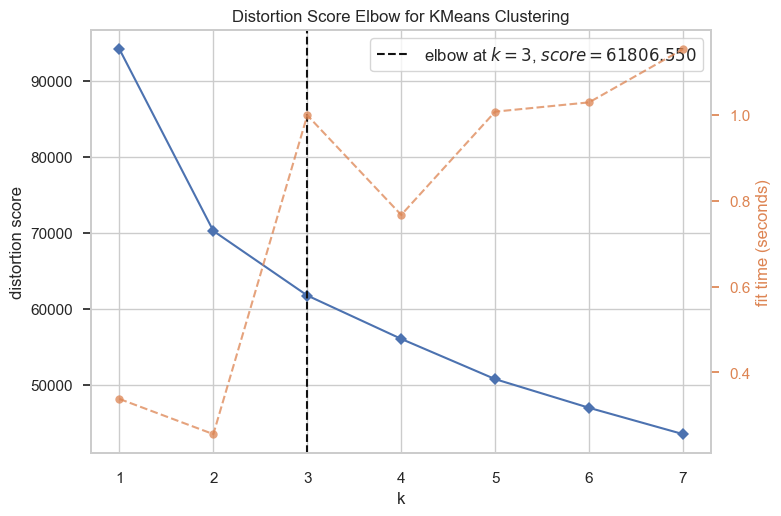

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [158]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 8))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

- Hasil analisis metode elbow menunjukkan bahwa **jumlah cluster optimal adalah 3**

In [159]:
# Fit KMeans model
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=random_state)
kmeans.fit(X)

initial_score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {initial_score:.4f}')

Silhouette Score: 0.2140


- Hasil cluster awal ini perlu dioptimasi dengan feature selection untuk mendapatkan silhouette score yang lebih tinggi

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, **bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection**.

### Feature Extraction: recency_days

In [229]:
df_opt = df_norm.copy()
df_opt['invoice_date'].head()

0   2022-08-05
1   2021-12-12
2   2021-11-09
3   2021-05-16
4   2021-10-24
Name: invoice_date, dtype: datetime64[ns]

In [230]:
# Reference date: March 9, 2023 because the last transaction was on 2021-03-08
reference_date = pd.to_datetime('2023-03-09')

# Calculate recency_days
df_opt['recency_days'] = (reference_date - df_opt['invoice_date']).dt.days
df_opt['recency_days'].describe()

count    99457.000000
mean       397.884030
std        229.871351
min          1.000000
25%        199.000000
50%        397.000000
75%        598.000000
max        797.000000
Name: recency_days, dtype: float64

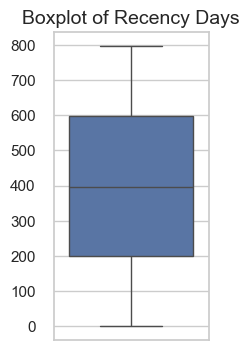

In [231]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot for the 'recency_days' column
plt.figure(figsize=(2, 4))
sns.boxplot(y=df_opt['recency_days'])

# Set the title and labels
plt.title('Boxplot of Recency Days', fontsize=14)
plt.ylabel('')

# Show the plot
plt.show()

In [232]:
# Normalize 'recency_days'
df_opt['recency_days'] = minmax_scaler.fit_transform(df_opt[['recency_days']])
df_opt['recency_days'].describe()

count    99457.000000
mean         0.498598
std          0.288783
min          0.000000
25%          0.248744
50%          0.497487
75%          0.750000
max          1.000000
Name: recency_days, dtype: float64

### Feature Extraction: Month

In [233]:
# Create 'year' and 'month' columns
# df_opt['year'] = df_opt['invoice_date'].dt.year
df_opt['month'] = df_opt['invoice_date'].dt.month

df_opt[['month']].describe()

,month
count,99457.000000
mean,6.113898
std,3.569511
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,12.000000


In [235]:
df_opt[['month']].describe()

,month
count,99457.000000
mean,6.113898
std,3.569511
min,1.000000
25%,3.000000
50%,6.000000
75%,9.000000
max,12.000000


In [236]:
# Normalize 'month'
# df_opt['year'] = minmax_scaler.fit_transform(df_opt[['year']])
df_opt['month'] = minmax_scaler.fit_transform(df_opt[['month']])
df_opt[['month']].describe()

,month
count,99457.000000
mean,0.464900
std,0.324501
min,0.000000
25%,0.181818
50%,0.454545
75%,0.727273
max,1.000000


### Feature Extraction: Transaction Value

In [237]:
df_opt['value'] = df['quantity'] * df['price']
df_opt['value'] = minmax_scaler.fit_transform(df_opt[['value']])
df_opt[['quantity', 'price', 'value']].head()

,quantity,price,value
0,1.00,0.285078,0.285648
1,0.50,0.342299,0.205614
2,0.00,0.056218,0.011235
3,1.00,0.571163,0.571505
4,0.75,0.010557,0.009037


In [238]:
df_opt[['quantity', 'price', 'value']].describe()

,quantity,price,value
count,99457.000000,99457.000000,99457.000000
mean,0.500857,0.130421,0.096155
std,0.353256,0.179452,0.160888
min,0.000000,0.000000,0.000000
25%,0.250000,0.007669,0.004996
50%,0.500000,0.037765,0.022669
75%,0.750000,0.227863,0.102706
max,1.000000,1.000000,1.000000


In [239]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  float64       
 3   category        99457 non-null  float64       
 4   quantity        99457 non-null  float64       
 5   price           99457 non-null  float64       
 6   payment_method  99457 non-null  float64       
 7   invoice_date    99457 non-null  datetime64[ns]
 8   shopping_mall   99457 non-null  float64       
 9   age_group       99457 non-null  float64       
 10  recency_days    99457 non-null  float64       
 11  month           99457 non-null  float64       
 12  value           99457 non-null  float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 9.9+ MB


### Adjust Categorical Feature Weight

In [240]:
df_opt.describe()

,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group,recency_days,month,value
count,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000
mean,0.598068,0.482998,0.500857,0.130421,0.660959,2022-02-04 02:46:59.783424,0.570679,0.556427,0.498598,0.464900,0.096155
min,0.000000,0.000000,0.000000,0.000000,0.000000,2021-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.171253,0.250000,0.007669,0.609488,2021-07-19 00:00:00,0.328443,0.200000,0.248744,0.181818,0.004996
50%,1.000000,0.331966,0.500000,0.037765,0.609488,2022-02-05 00:00:00,0.674068,0.600000,0.497487,0.454545,0.022669
75%,1.000000,1.000000,0.750000,0.227863,1.000000,2022-08-22 00:00:00,0.992070,0.800000,0.750000,0.727273,0.102706
max,1.000000,1.000000,1.000000,1.000000,1.000000,2023-03-08 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.490291,0.392017,0.353256,0.179452,0.374833,NaN,0.403727,0.304388,0.288783,0.324501,0.160888


In [241]:
df_opt_weighted = df_opt.copy()

In [215]:
df_opt_weighted['gender'] = df_opt_weighted['gender'] * 0.2
df_opt_weighted['payment_method'] = df_opt_weighted['payment_method'] * 0.3

- Kolom 'gender' & 'payment_method' kalau dibiarkan menggunakan nilai minmax 0-1 akan terlalu mendominasi perhitungan clustering kmeans

In [242]:
df_opt_weighted.describe()

,gender,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group,recency_days,month,value
count,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000
mean,0.598068,0.482998,0.500857,0.130421,0.660959,2022-02-04 02:46:59.783424,0.570679,0.556427,0.498598,0.464900,0.096155
min,0.000000,0.000000,0.000000,0.000000,0.000000,2021-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.171253,0.250000,0.007669,0.609488,2021-07-19 00:00:00,0.328443,0.200000,0.248744,0.181818,0.004996
50%,1.000000,0.331966,0.500000,0.037765,0.609488,2022-02-05 00:00:00,0.674068,0.600000,0.497487,0.454545,0.022669
75%,1.000000,1.000000,0.750000,0.227863,1.000000,2022-08-22 00:00:00,0.992070,0.800000,0.750000,0.727273,0.102706
max,1.000000,1.000000,1.000000,1.000000,1.000000,2023-03-08 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.490291,0.392017,0.353256,0.179452,0.374833,NaN,0.403727,0.304388,0.288783,0.324501,0.160888


### Random Search

In [243]:
# Check all available features
features = list(df_opt_weighted .select_dtypes(include=['number']).columns)  # Ensure only numerical features are selected
features

['gender',
 'category',
 'quantity',
 'price',
 'payment_method',
 'shopping_mall',
 'age_group',
 'recency_days',
 'month',
 'value']

In [244]:
print(f"Optimum k from initial cluster: {k}")

Optimum k from initial cluster: 3


- Selanjutnya akan dilakukan random search & grid search berdasarkan nilai k=3

In [245]:
def get_mixed_feature_combinations(numeric_features, categoric_features, min_size=2, max_size=3):
    """
    Generate mixed feature combinations with controlled size range.

    This function takes lists of numeric and categorical features and generates 
    all possible combinations of those features with a size range defined by 
    `min_size` and `max_size`. Each combination must contain at least one numeric 
    and one categorical feature.

    Parameters:
        numeric_features (list): A list of numeric feature names (strings).
        categoric_features (list): A list of categorical feature names (strings).
        min_size (int, optional): The minimum number of features in each combination. 
                                  Default is 2.
        max_size (int, optional): The maximum number of features in each combination. 
                                  Default is 3. The value is automatically adjusted 
                                  if it exceeds the total number of features.

    Returns:
        list: A list of lists, where each inner list represents a unique combination 
              of mixed features (numeric and categorical) within the specified size range.

    Example:
        numeric_features = ['num1', 'num2', 'num3']
        categoric_features = ['cat1', 'cat2']
        min_size = 2
        max_size = 3
        get_mixed_feature_combinations(numeric_features, categoric_features, min_size, max_size)
        # Output:
        # [['num1', 'cat1'], ['num1', 'cat2'], ['num2', 'cat1'], ['num2', 'cat2'], 
        #  ['num3', 'cat1'], ['num3', 'cat2'], ['num1', 'num2', 'cat1'], 
        #  ['num1', 'num2', 'cat2'], ['num1', 'num3', 'cat1'], ['num1', 'num3', 'cat2'], 
        #  ['num2', 'num3', 'cat1'], ['num2', 'num3', 'cat2']]
    """
    # Calculate the maximum size for combinations based on available features
    max_size = min(max_size, len(numeric_features) + len(categoric_features))

    mixed_combinations = []

    # Generate combinations of numeric features and categorical features
    for i in range(min_size, max_size + 1):
        for j in range(1, i):  # Ensure at least one feature from each type
            # Numeric part
            for num_comb in combinations(numeric_features, j):
                # Categorical part
                for cat_comb in combinations(categoric_features, i - j):
                    mixed_combinations.append(list(num_comb) + list(cat_comb))

    return mixed_combinations

In [246]:
def find_optimum_cluster_features_random(df, feature_combinations, n_iter=20, silhouette_threshold=0.7):
    """
    Perform random search over feature combinations to find the best set of features for KMeans clustering.
    
    Args:
    - feature_combinations (list): List of all possible feature combinations.
    - n_iter (int): Number of random iterations to perform.
    - silhouette_threshold (float): Silhouette score threshold to stop the search early.

    Returns:
    - best_features (list): Best feature combination found.
    - best_score (float): Silhouette score of the best feature combination.
    """
    # Initialize variables to track the best score and features
    best_score = -1
    best_features = None

    print("Starting random search over feature subsets...\n")
    
    # Randomly select subsets to evaluate
    for i in range(n_iter):
        subset = random.choice(feature_combinations)  # Randomly pick a feature combination
        
        # Subset the data
        df_subset = df[subset]

        try:
            # Fit K-means
            kmeans = KMeans(n_clusters=k, init='k-means++', n_init=5, random_state=random_state)
            labels = kmeans.fit_predict(df_subset)
            
            # Calculate Silhouette Score
            score = silhouette_score(df_subset, labels)

            # Update the best score and features if applicable
            if score > best_score:
                best_score = score
                best_features = subset
                print(f"Iteration {i + 1}: New best found! Features: {subset}, Silhouette Score: {score:.4f}")
                
                # Stop the loop if the silhouette score reaches the desired threshold
                if best_score >= silhouette_threshold:
                    print("Stopping early as the silhouette score threshold has been reached.")
                    break
            else:
                print(f"Iteration {i + 1}: Features: {subset}, Silhouette Score: {score:.4f}")  # Log current iteration result
            
        except Exception as e:
            print(f"Iteration {i + 1}: Failed for subset {subset} with error: {e}")

    print("\nRandom search completed.")
    print(f"Best Feature Combination: {best_features}, Silhouette Score: {best_score:.4f}")
    return best_features, best_score

In [247]:
all_features_new = list(df_opt.columns)
all_features_new

['invoice_no',
 'customer_id',
 'gender',
 'category',
 'quantity',
 'price',
 'payment_method',
 'invoice_date',
 'shopping_mall',
 'age_group',
 'recency_days',
 'month',
 'value']

In [248]:
numeric_features = ['quantity', 'price', 'value', 'recency_days', 'month']
categoric_features = ['gender', 'category', 'payment_method', 'age_group']

In [249]:
CONSTANT_2 = 2
feature_combinations_2 = get_mixed_feature_combinations(numeric_features, categoric_features, min_size=CONSTANT_2, max_size=CONSTANT_2)

print(f"With {CONSTANT_2} features, there are {len(feature_combinations_2):,} mixed features combinations.")

With 2 features, there are 20 mixed features combinations.


In [225]:
feature_combinations_2

[['quantity', 'gender'],
 ['quantity', 'category'],
 ['quantity', 'payment_method'],
 ['quantity', 'age_group'],
 ['price', 'gender'],
 ['price', 'category'],
 ['price', 'payment_method'],
 ['price', 'age_group'],
 ['value', 'gender'],
 ['value', 'category'],
 ['value', 'payment_method'],
 ['value', 'age_group'],
 ['recency_days', 'gender'],
 ['recency_days', 'category'],
 ['recency_days', 'payment_method'],
 ['recency_days', 'age_group'],
 ['year', 'gender'],
 ['year', 'category'],
 ['year', 'payment_method'],
 ['year', 'age_group'],
 ['month', 'gender'],
 ['month', 'category'],
 ['month', 'payment_method'],
 ['month', 'age_group']]

In [250]:
best_features_2, best_score_2  = find_optimum_cluster_features_random(df_opt, feature_combinations_2, n_iter=10, silhouette_threshold=0.7)

Starting random search over feature subsets...

Iteration 1: New best found! Features: ['quantity', 'payment_method'], Silhouette Score: 0.5081
Iteration 2: New best found! Features: ['price', 'category'], Silhouette Score: 0.7536
Stopping early as the silhouette score threshold has been reached.

Random search completed.
Best Feature Combination: ['price', 'category'], Silhouette Score: 0.7536


In [255]:
CONSTANT_3 = 3
feature_combinations_3 = get_mixed_feature_combinations(numeric_features, categoric_features, min_size=CONSTANT_3, max_size=CONSTANT_3)

print(f"With {CONSTANT_3} features, there are {len(feature_combinations_3):,} mixed features combinations.")

With 3 features, there are 70 mixed features combinations.


In [185]:
feature_combinations_3

[['quantity', 'gender', 'category'],
 ['quantity', 'gender', 'payment_method'],
 ['quantity', 'gender', 'age_group'],
 ['quantity', 'category', 'payment_method'],
 ['quantity', 'category', 'age_group'],
 ['quantity', 'payment_method', 'age_group'],
 ['price', 'gender', 'category'],
 ['price', 'gender', 'payment_method'],
 ['price', 'gender', 'age_group'],
 ['price', 'category', 'payment_method'],
 ['price', 'category', 'age_group'],
 ['price', 'payment_method', 'age_group'],
 ['value', 'gender', 'category'],
 ['value', 'gender', 'payment_method'],
 ['value', 'gender', 'age_group'],
 ['value', 'category', 'payment_method'],
 ['value', 'category', 'age_group'],
 ['value', 'payment_method', 'age_group'],
 ['recency_days', 'gender', 'category'],
 ['recency_days', 'gender', 'payment_method'],
 ['recency_days', 'gender', 'age_group'],
 ['recency_days', 'category', 'payment_method'],
 ['recency_days', 'category', 'age_group'],
 ['recency_days', 'payment_method', 'age_group'],
 ['year', 'gende

In [256]:
best_features_3, best_score_3 = find_optimum_cluster_features_random(df_opt, feature_combinations_3, n_iter=35, silhouette_threshold=0.7)

Starting random search over feature subsets...

Iteration 1: New best found! Features: ['value', 'category', 'payment_method'], Silhouette Score: 0.4896
Iteration 2: Features: ['quantity', 'category', 'payment_method'], Silhouette Score: 0.3705


KeyboardInterrupt: 

- Computing resource terlalu besar untuk melanjutkan random search dengan 3 fitur, langsung dipilih kombinasi fitur ['price', 'category'] saja.

###  Optimized Cluster

In [257]:
X1 = df_opt[best_features_2].values 
X1

array([[2.85078278e-01, 1.00000000e+00],
       [3.42299090e-01, 1.71253304e-01],
       [5.62179085e-02, 1.00000000e+00],
       ...,
       [9.97183861e-04, 3.31966380e-01],
       [7.99800563e-01, 5.08371179e-04],
       [5.71235726e-03, 6.10045414e-04]], shape=(99457, 2))

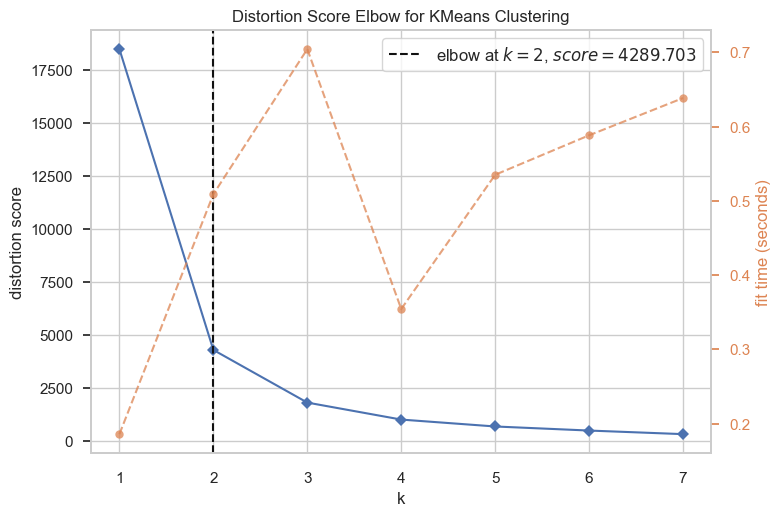

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [258]:
kmeans_1 = KMeans(init='k-means++', n_init=10, random_state=random_state)

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans_1, k=(1, 8))
 
# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X1)
 
# Menampilkan grafik elbow untuk analisis
visualizer.show()

- Meskipun random search dilakukan dengan k=2, hasil analisis elbow method menunjukkan jumlah cluster optimal adalah 2

In [259]:
# Fit KMeans model
k = 2
kmeans_1 = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=random_state)
kmeans_1.fit(X1)

optimized_score = silhouette_score(X1, kmeans_1.labels_)
print(f'Silhouette Score: {optimized_score:.4f}')

Silhouette Score: 0.7570


### Perbandingan Silhouette Score & Fitur sebelum dan sesudah optimasi
- Sebelum optimasi (sudah menerapkan binning, normalization, & encoding): 
  - Initial_Clusters -> Feature: ['gender', 'category', 'quantity', 'price', 'payment_method', 'shopping_mall', 'age_group'], k=3, Silhouette Score: 0.2140
- Setelah optimasi dengan feature selection menggunakan random search:
  - Optimized_2_feature -> Feature: ['price', 'category'], k=2, Silhouette Score: 0.7570

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [260]:
# Check if indices align
if (df.index == df_opt.index).all():
    print("Row order is preserved.")
else:
    print("Row order has been altered.")

Row order is preserved.


In [275]:
df_clustered = df.copy()

df_clustered['value'] = df_clustered['quantity'] * df_clustered['price']
df_clustered['invoice_date'] = pd.to_datetime(df_clustered['invoice_date'], format='%d/%m/%Y')
df_clustered['invoice_year'] = df_clustered['invoice_date'].dt.year
df_clustered['invoice_month'] = df_clustered['invoice_date'].dt.month
df_clustered['recency_days'] = (reference_date - df_clustered['invoice_date']).dt.days
# Create a new column 'age_bins' to hold the binned data
df_clustered['age_group'] = pd.cut(df_clustered['age'], bins=bins_age, labels=labels_age_groups, right=True)

# Display the binned data
df_clustered[['age','age_group']].head()

df_clustered['cluster'] = kmeans_1.labels_

centroids = kmeans_1.cluster_centers_

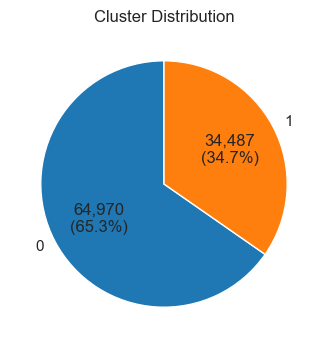

In [276]:
# Get the value counts
cluster_counts = df_clustered['cluster'].value_counts()
total = cluster_counts.sum()  # Total number of data points

# Define a custom function for the labels
def autopct_format(pct, all_vals):
    absolute = int(round(pct * sum(all_vals) / 100.0))  # Calculate absolute values
    return f"{absolute:,}\n({pct:.1f}%)"  # Format: "data_size \n (percentage)"

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    cluster_counts, 
    labels=cluster_counts.index, 
    autopct=lambda pct: autopct_format(pct, cluster_counts),  # Use custom function
    startangle=90, 
    colors=plt.cm.tab10.colors
)
plt.title("Cluster Distribution")
plt.show()


In [277]:
df_clustered.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall', 'value',
       'invoice_year', 'invoice_month', 'recency_days', 'age_group',
       'cluster'],
      dtype='object')

In [278]:
numeric_columns_result = ['age', 'quantity', 'price', 'invoice_year', 'invoice_month', 'recency_days']
categoric_columns_result = ['gender', 'category', 'payment_method', 'age_group']

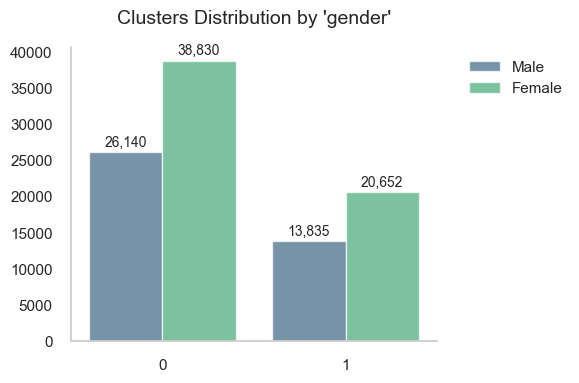

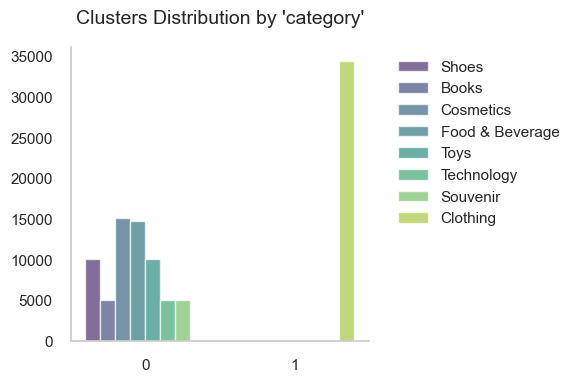

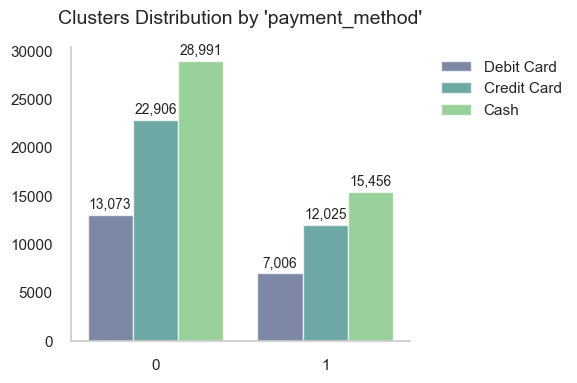

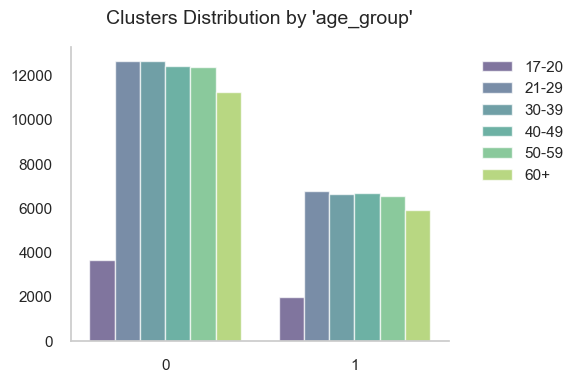

In [296]:
# Create a count plot for clusters and gender with categoric_columns_result as hue
for col in categoric_columns_result:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(
        data=df_clustered,
        x='cluster',
        hue=col,
        palette='viridis',
        alpha=0.7
    )

    if col not in ['category', 'age_group']:
        # Adding data labels with comma formatting
        for container in ax.containers:
            ax.bar_label(container, fmt='{:,.0f}', label_type='edge', fontsize=10, padding=2)

    plt.title(f"Clusters Distribution by '{col}'", fontsize=14, y=1.05)
    plt.grid(False)  # Remove the grid
    plt.xlabel("", fontsize=12)
    plt.ylabel("", fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    sns.despine(top=True, right=True)
    plt.tight_layout()
    plt.show()



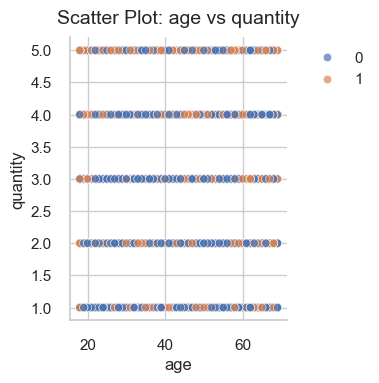

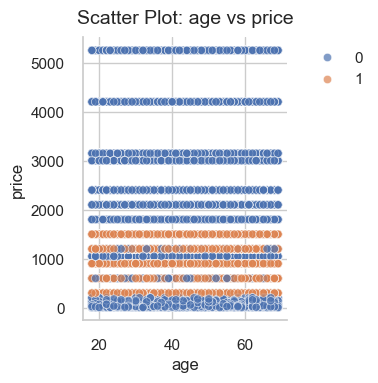

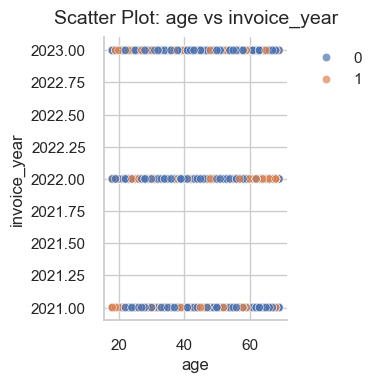

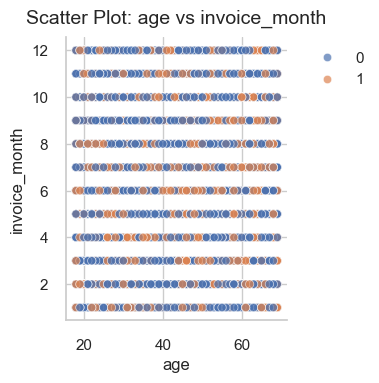

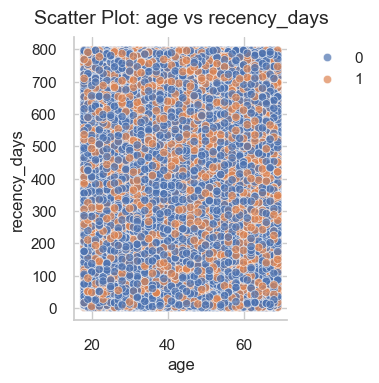

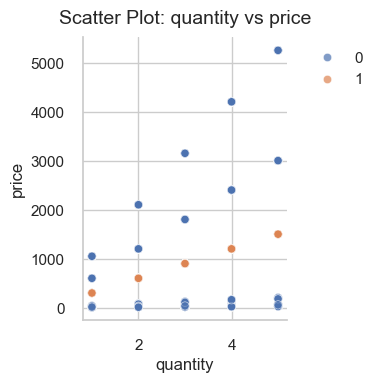

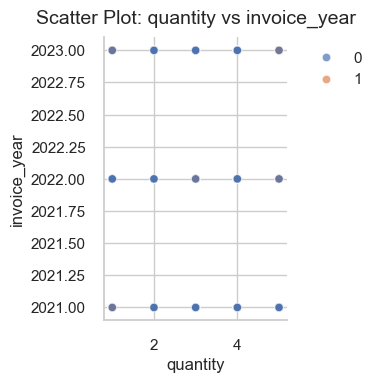

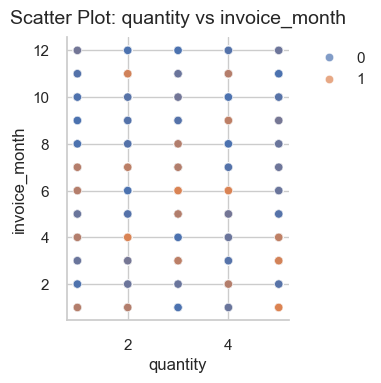

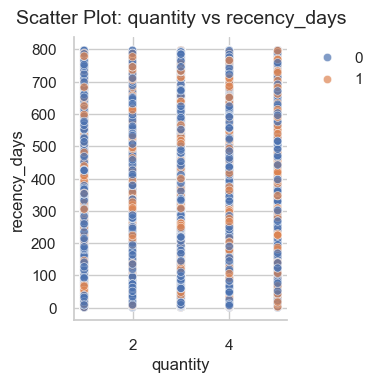

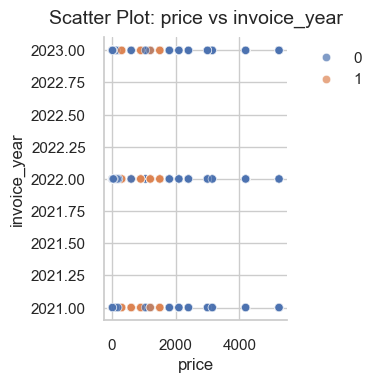

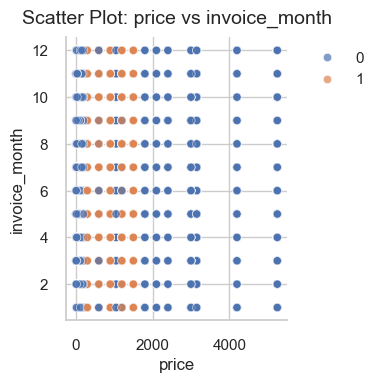

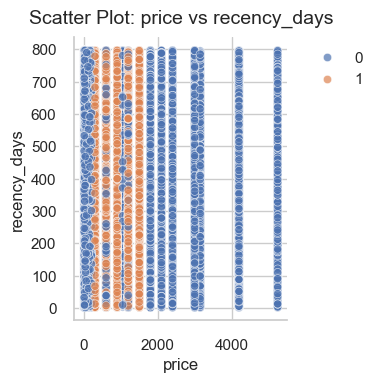

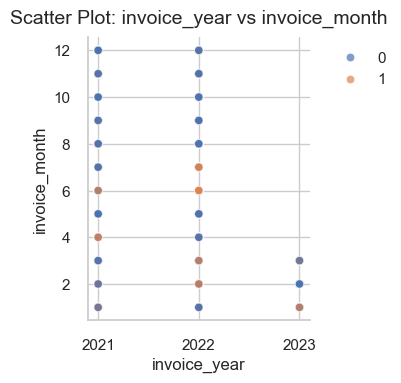

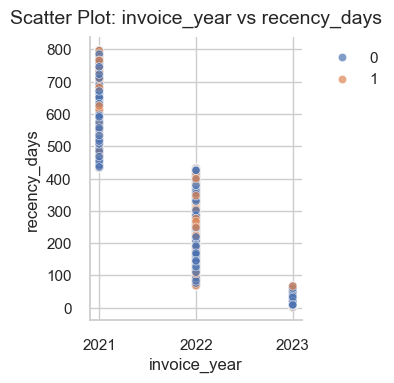

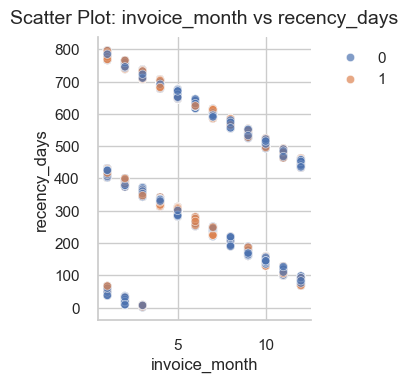

In [298]:
# Generate all pairs of numeric columns
numeric_combinations = list(combinations(numeric_columns_result, 2))

for x_col, y_col in numeric_combinations:
    plt.figure(figsize=(4, 4))
    sns.scatterplot(
        data=df_clustered,
        x=x_col,
        y=y_col,
        hue='cluster',
        alpha=0.7
    )
    
    plt.title(f"Scatter Plot: {x_col} vs {y_col}", fontsize=14, y=1.02)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
    sns.despine()  # Remove top and right spines
    plt.tight_layout()  # Prevent overlap with title/legend
    plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [300]:
# Group by 'cluster' and aggregate with multiple statistics
cluster_stats = df_clustered.groupby('cluster').agg(
    size=('customer_id', 'count'),  # Count of entries in each cluster
    min_price=('price', 'min'),
    max_price=('price', 'max'),
    avg_price=('price', 'mean'),
    top_category=('category', lambda x: x.mode().iloc[0]),
)

# Display the result
cluster_stats

,size,min_price,max_price,avg_price,top_category
cluster,,,,,
0,64970,5.23,5250.0,576.815165,Cosmetics
1,34487,300.08,1500.4,901.084021,Clothing


In [305]:
# Vreate pivot tables
for col in ['category']:
    print(f"Cluster Distribution by '{col}':")
    pivot_table = df_clustered.pivot_table(index='cluster', columns=col, aggfunc='size', fill_value=0)
    display(pivot_table)

Cluster Distribution by 'category':


category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
cluster,,,,,,,,
0,4981,0,15097,14776,10034,4999,4996,10087
1,0,34487,0,0,0,0,0,0


Tulis hasil interpretasinya di sini.
1. Cluster 0: **Non-cloting buyers**, yaitu customer yang membeli produk selain pakaian
   - Seluruh customer yang **tidak** membeli produk category 'Clothing' masuk di cluster ini
   - Harga produk yang dibeli oleh cluster ini berada pada rentang yang cukup lebar, yaitu 5.23 - 5,250 Lira dengan rata-rata 576.8 Lira
2. Cluster 1: **Clothing buyers**, yaitu customer yang membeli produk pakaian (sebanyak )
   - Seluruh customer yang membeli produk category 'Clothing' masuk di cluster ini
   - Harga produk yang dibeli oleh cluster ini berada pada rentang yang lebih sempit, yaitu 300.08 - 1,500.4 Lira dengan rata-rata 901.08 Lira (lebih tinggi dari non-clothing buyers)

Hasil clustering menggunakan kmeans memang kurang cocok untuk mixed features (kombinasi numeric & categoric features), namun algoritma yang lebih cocok untuk mixed features tidak secara native menggunakan silhouette score sebagai metric evaluasinya, untuk tujuan submission dicoding digunakan kmeans dengan feature selection untuk mengoptimalkan pemilihan fitur dengan silhouette score > 0.7

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [309]:
cols_to_export = list(df.columns) + ["cluster"]
cols_to_export

['invoice_no',
 'customer_id',
 'gender',
 'age',
 'category',
 'quantity',
 'price',
 'payment_method',
 'invoice_date',
 'shopping_mall',
 'cluster']

In [310]:
file_output = dir_ + "customer_shopping_clustered.csv"
df_clustered[cols_to_export].to_csv(file_output, index=False)